In [1]:
import pandas as pd
df = pd.read_csv("../data/bitcoin-data.csv")
df.head()

C:\Users\Movahed\AppData\Local\Temp\ipykernel_32388\3661044886.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/bitcoin-data.csv")


,Timestamp,Open,High,Low,Close,Volume,datetime
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:01:00+00:00
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:02:00+00:00
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:03:00+00:00
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:04:00+00:00
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:05:00+00:00


In [ ]:
# Splitting the dataset in half to reduce size (Just in case)
half_index = len(df) // 2

# Split the DataFrame
first_half = df.iloc[:half_index]
second_half = df.iloc[half_index:]

# Save to two new CSV files
first_half.to_csv('bitcoin-data-part1.csv', index=False)
second_half.to_csv('bitcoin-data-part2.csv', index=False)

print(f"✅ Split complete! Rows in each file: {len(first_half)} and {len(second_half)}")

✅ Split complete! Rows in each file: 3492583 and 3492583


In [2]:
# Changing datetime column data type to datetime type

df['datetime'] = pd.to_datetime(df['datetime'])
print(df.dtypes)

Timestamp                float64
Open                     float64
High                     float64
Low                      float64
Close                    float64
Volume                   float64
datetime     datetime64[ns, UTC]
dtype: object


In [3]:
# Sorting and indexing the dataset with datetime table (should run only once)

df = df.sort_values('datetime')
df.set_index('datetime', inplace=True)

In [44]:
# Extract weekly price change
data_1w = df.resample('W').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})
data_1w.head()

,Open,High,Low,Close,Volume
datetime,,,,,
2012-01-01 00:00:00+00:00,4.58,4.84,4.58,4.84,10.000000
2012-01-08 00:00:00+00:00,4.84,6.90,4.84,6.90,357.398975
2012-01-15 00:00:00+00:00,6.90,7.38,6.23,7.15,400.325314
2012-01-22 00:00:00+00:00,7.15,7.15,5.52,6.83,731.186776
2012-01-29 00:00:00+00:00,6.83,6.86,3.80,5.90,386.244037


In [6]:
# Extract daily price change based on last close of each day
data_1d = df.resample('D').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})
data_1d.head()

,Open,High,Low,Close,Volume
datetime,,,,,
2012-01-01 00:00:00+00:00,4.58,4.84,4.58,4.84,10.000000
2012-01-02 00:00:00+00:00,4.84,5.00,4.84,5.00,10.100000
2012-01-03 00:00:00+00:00,5.00,5.32,5.00,5.29,107.085281
2012-01-04 00:00:00+00:00,5.29,5.57,4.93,5.57,107.233260
2012-01-05 00:00:00+00:00,5.57,6.46,5.57,6.42,70.328742


In [ ]:
# Extract 15 minutes price change

data_15m = df.resample('15T').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})

data_15m.head()

C:\Users\Movahed\AppData\Local\Temp\ipykernel_31996\1644631033.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_15m = df.resample('15T').agg({


,Open,High,Low,Close,Volume
datetime,,,,,
2012-01-01 10:00:00+00:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 10:15:00+00:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 10:30:00+00:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 10:45:00+00:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 11:00:00+00:00,4.58,4.58,4.58,4.58,0.0


In [ ]:
# Extracting 1h timeframe data from original data

data_1h = df.resample('1H').agg({
    'Open' : 'first',
    'High' : 'max',
    'Low' : 'min',
    'Close' : 'last',
    'Volume' : 'sum'
})

data_1h.head()

C:\Users\Movahed\AppData\Local\Temp\ipykernel_31996\586702569.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_1h = df.resample('1H').agg({


,Open,High,Low,Close,Volume
datetime,,,,,
2012-01-01 10:00:00+00:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 11:00:00+00:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 12:00:00+00:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 13:00:00+00:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 14:00:00+00:00,4.58,4.58,4.58,4.58,0.0


In [ ]:
# Extracting 4h timeframe data from original data

data_4h = df.resample('4H').agg({
    'Open' : 'first',
    'High' : 'max',
    'Low' : 'min',
    'Close' : 'last',
    'Volume' : 'sum'
})

data_4h.head()

C:\Users\Movahed\AppData\Local\Temp\ipykernel_31996\3472059405.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_4h = df.resample('4H').agg({


,Open,High,Low,Close,Volume
datetime,,,,,
2012-01-01 08:00:00+00:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 12:00:00+00:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 16:00:00+00:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 20:00:00+00:00,4.58,4.84,4.58,4.84,10.0
2012-01-02 00:00:00+00:00,4.84,5.00,4.84,5.00,10.1


In [ ]:
# Extracting 8h timeframe data from Original data

data_8h = df.resample('8H').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})

data_8h.head()

C:\Users\Movahed\AppData\Local\Temp\ipykernel_31996\4240041718.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_8h = df.resample('8H').agg({


,Open,High,Low,Close,Volume
datetime,,,,,
2012-01-01 08:00:00+00:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 16:00:00+00:00,4.58,4.84,4.58,4.84,10.0
2012-01-02 00:00:00+00:00,4.84,5.00,4.84,5.00,10.1
2012-01-02 08:00:00+00:00,5.00,5.00,5.00,5.00,0.0
2012-01-02 16:00:00+00:00,5.00,5.00,5.00,5.00,0.0


In [49]:
# Saving new timeframes as parquet files

df.to_parquet("btc_1m.parquet", engine='pyarrow')
data_15m.to_parquet("btc_15m.parquet", engine='pyarrow')
data_1h.to_parquet("btc_1h.parquet", engine='pyarrow')
data_4h.to_parquet("btc_4h.parquet", engine='pyarrow')
data_8h.to_parquet("btc_8h.parquet", engine='pyarrow')
data_1d.to_parquet("btc_1d.parquet", engine='pyarrow')
data_1w.to_parquet("btc_1w.parquet", engine='pyarrow')

In [ ]:
# Reading parquets and calculating SMA and EMA  for different timeframes and save them back to parquets

# available timeframes
timeframes = ['1m', '15m', '1h', '4h', '8h', '1d', '1w']

# window values for SMA and EMA
sma_ema_values= [20, 50, 100, 200]

for t in timeframes:
    path = f"../data/btc_{t}.parquet"
    df_test = pd.read_parquet(path)
    for i in sma_ema_values:
        df_test[f"SMA_{i}"] = df_test['Close'].rolling(i).mean()
        df_test[f"EMA_{i}"] = df_test['Close'].ewm(span=i, adjust=False).mean()

    df_test.to_parquet(f"../data/btc_{t}.parquet", engine="pyarrow")




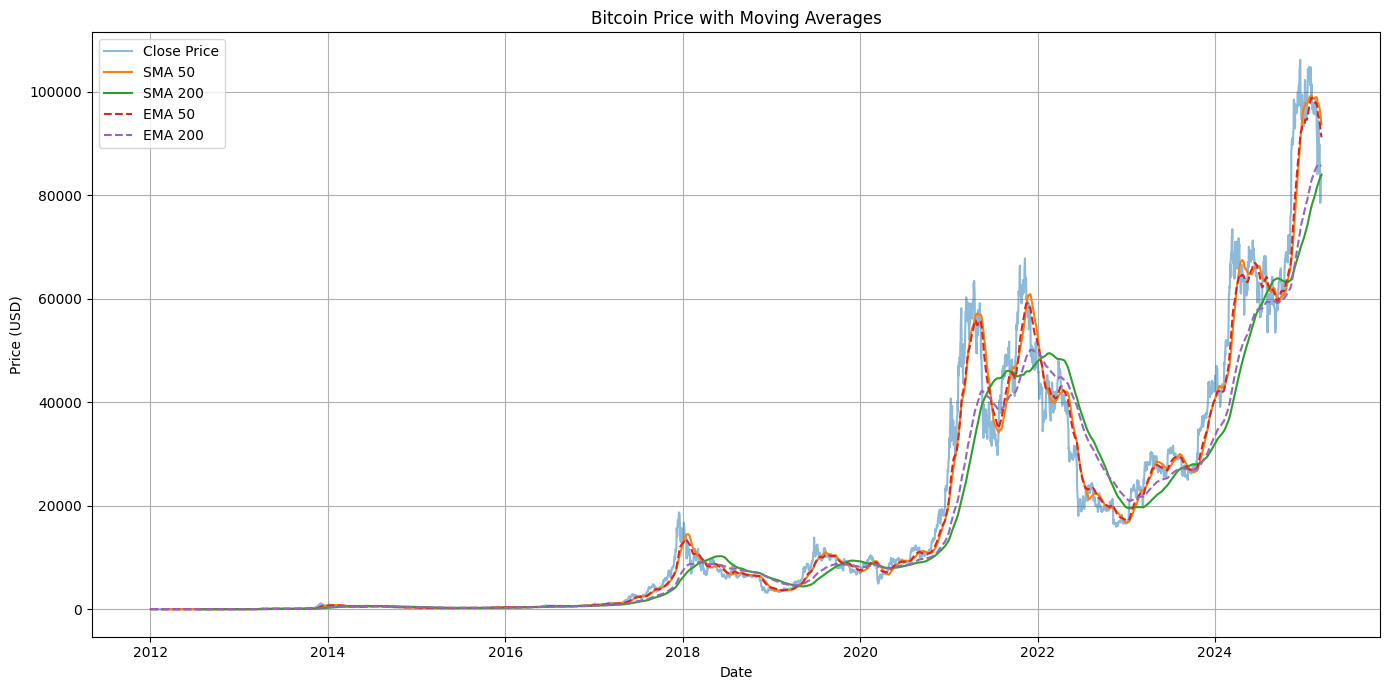

In [5]:
# plot SMA and EMA 50 and 200 on daily timeframe to test

import matplotlib.pyplot as plt

df_test = pd.read_parquet("../data/btc_1d.parquet")

plt.figure(figsize=(14, 7))
plt.plot(df_test['Close'], label='Close Price', alpha=0.5)

# Plot selected moving averages
plt.plot(df_test['SMA_50'], label='SMA 50')
plt.plot(df_test['SMA_200'], label='SMA 200')
plt.plot(df_test['EMA_50'], label='EMA 50', linestyle='--')
plt.plot(df_test['EMA_200'], label='EMA 200', linestyle='--')

plt.title("Bitcoin Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Calculating RSI for all timeframes
import numpy as np

# defining different timeframes of BTC price available
timeframes = ['1m', '15m', '1h', '4h', '8h', '1d', '1w']

# creating function to calculate RSI
def calculate_rsi(close, period=14):
    delta = close.diff()
    gain = delta.where(delta > 0, 0).rolling(period).mean()
    loss = -delta.where(delta < 0, 0).rolling(period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Reading timeframes one by one and calculate RSI
for t in timeframes:
    path=f"../data/btc_{t}.parquet"
    df_test = pd.read_parquet(path)
    df_test['RSI_14'] = calculate_rsi(df_test['Close']) # calculating RSI
    
    df_test['RSI_Signal'] = np.where(df_test['RSI_14'] > 70, 'Overbought',
                                     np.where(df_test['RSI_14'] < 30, 'Oversold', 'Neutral'))   # Detecting RSI Signals
    
    df_test['RSI_Crossover'] = (
        ((df_test['RSI_14'] > 70) & (df_test['RSI_14'].shift(1) <= 70))  |
        ((df_test['RSI_14'] < 30) & (df_test['RSI_14'].shift(1) >= 30))
    )

# Saving new RSI_14, RSI_Signal and RSI_Crossover columns into parquets
    df_test.to_parquet(f"../data/btc_{t}.parquet", engine="pyarrow")
    print(f"RSI_14, RSI_Signal and RSI_Crossover saved for timeframe: {t}")


RSI_14, RSI_Signal and RSI_Crossover saved for timeframe: 1m
RSI_14, RSI_Signal and RSI_Crossover saved for timeframe: 15m
RSI_14, RSI_Signal and RSI_Crossover saved for timeframe: 1h
RSI_14, RSI_Signal and RSI_Crossover saved for timeframe: 4h
RSI_14, RSI_Signal and RSI_Crossover saved for timeframe: 8h
RSI_14, RSI_Signal and RSI_Crossover saved for timeframe: 1d
RSI_14, RSI_Signal and RSI_Crossover saved for timeframe: 1w


In [ ]:
# Calculating Upper and Lower bands for Bollinger bands strategyon different timeframes

# defining different timeframes of BTC price available
timeframes = ['1m', '15m', '1h', '4h', '8h', '1d', '1w']


# Required parameters
window = 20
num_std = 2

# Defining a loop to calculate Bollinger Bands for each timeframe
for t in timeframes:
    path = f"../data/btc_{t}.parquet"
    df_test = pd.read_parquet(path)

    # Calculating standard deviation 
    df_test['STD_20'] = df_test['Close'].rolling(window=window).std()

    # Upper and Lower bands
    df_test['Upper_Band_20'] = df_test['SMA_20'] + ( num_std * df_test['STD_20'])
    df_test['Lower_Band_20'] = df_test['SMA_20'] - ( num_std * df_test['STD_20'])

    df_test.to_parquet(f"../data/btc_{t}.parquet", engine="pyarrow")
    print(f"Bollinger Bands saved for timeframe: {t}")

Bollinger Bands saved for timeframe: 1m
Bollinger Bands saved for timeframe: 15m
Bollinger Bands saved for timeframe: 1h
Bollinger Bands saved for timeframe: 4h
Bollinger Bands saved for timeframe: 8h
Bollinger Bands saved for timeframe: 1d
Bollinger Bands saved for timeframe: 1w


In [ ]:
# Calculating interval's and cummulating retuns per interval (return per interval)


# timeframes
timeframes = ['1m', '15m', '1h', '4h', '8h', '1d', '1w']

for t in timeframes:
    path = f"../data/btc_{t}.parquet"
    df_test = pd.read_parquet(path)

    # Calculate Daily Return
    df_test['Daily_Return'] = df_test['Close'].pct_change()

    # Calculate Cumulative Return
    df_test['Cumulative_Return'] = (1 + df_test['Daily_Return']).cumprod()

    df_test.to_parquet(f"../data/btc_{t}.parquet", engine="pyarrow")
    print(f"{t} done.")

1m done.


C:\Users\Movahed\AppData\Local\Temp\ipykernel_31996\1863079016.py:12: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_test['Daily_Return'] = df_test['Close'].pct_change()


15m done.


C:\Users\Movahed\AppData\Local\Temp\ipykernel_31996\1863079016.py:12: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_test['Daily_Return'] = df_test['Close'].pct_change()


1h done.
4h done.
8h done.
1d done.
1w done.


C:\Users\Movahed\AppData\Local\Temp\ipykernel_31996\1863079016.py:12: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_test['Daily_Return'] = df_test['Close'].pct_change()
C:\Users\Movahed\AppData\Local\Temp\ipykernel_31996\1863079016.py:12: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_test['Daily_Return'] = df_test['Close'].pct_change()


In [ ]:
# Calculating Volatility metrics on all timeframes

# timeframes
timeframes = ['1m', '15m', '1h', '4h', '8h', '1d', '1w']

# Defining a function to categorize volatility
def Volatility_category(volatility):
    if volatility < 0.5:
        return "Very Stable"
    elif volatility < 1:
        return "Stable"
    elif volatility  < 2:
        return "Normal"
    elif volatility < 5:
        return "High"
    else:
        return "Extreme" 

for t in timeframes:
    path = f"../data/btc_{t}.parquet"
    df_test = pd.read_parquet(path)

    # Calculating Volatility
    df_test['Volatility_14'] = df_test['Daily_Return'].rolling(window=14).std() * 100

    # Categorizing using the predefined function
    df_test['Volatility_Category'] = df_test['Volatility_14'].apply(Volatility_category)

    df_test.to_parquet(f"../data/btc_{t}.parquet", engine="pyarrow")
    print(f"Volatility saved for timeframe: {t}")

Volatility saved for timeframe: 1m
Volatility saved for timeframe: 15m
Volatility saved for timeframe: 1h
Volatility saved for timeframe: 4h
Volatility saved for timeframe: 8h
Volatility saved for timeframe: 1d
Volatility saved for timeframe: 1w


In [ ]:
# Calculating Trend Momentum Indicator (MACD) 
# Based on research, gathered most suitable EMA windows for creatind MACD in each timeframes based on the fact that using lower timeframes for fast scalping trades - 
# -and longer ones for holding more than a day

#Best setups for each timeframe
macd_setups = {
    '1m' : {'short':5, 'long':13, 'signal':5},
    '15m' : {'short':8, 'long':21, 'signal':9},
    '1h' : {'short':12, 'long':26, 'signal':9},
    '4h' : {'short':12, 'long':26, 'signal':9},
    '8h' : {'short':12, 'long':26, 'signal':9},
    '1d' : {'short':12, 'long':26, 'signal':9},
    '1w' : {'short':26, 'long':78, 'signal':18}
}

# Defining a function to calculate MACD with MACD setups mentioned above
def calculate_macd(data, short, long, signal):
    ema_short = data['Close'].ewm(span=short, adjust=False).mean()
    ema_long = data['Close'].ewm(span=long, adjust=False).mean()
    macd = ema_short - ema_long
    macd_signal = macd.ewm(span=signal, adjust=False).mean()
    macd_histogram = macd - macd_signal
    return macd, macd_signal, macd_histogram

# timeframes
timeframes = ['1m', '15m', '1h', '4h', '8h', '1d', '1w']

# For loop to load parquets and perform calculations and save them back
for t in timeframes:
    path=f"../data/btc_{t}.parquet"
    df_test = pd.read_parquet(path)

    # Loading MACD setup for the timeframe
    setup = macd_setups[t]

    # Calculating MACD
    df_test['MACD'], df_test['MACD_Signal'], df_test['MACD_Histogram'] = calculate_macd(
        df_test,
        short=setup['short'],
        long=setup['long'],
        signal=setup['signal']
    )

    # Saving processed data as parquets
    df_test.to_parquet(f"../data/btc_{t}.parquet", engine="pyarrow")
    print(f"MACD calculated for timeframe: {t}")



MACD calculated for timeframe: 1m
MACD calculated for timeframe: 15m
MACD calculated for timeframe: 1h
MACD calculated for timeframe: 4h
MACD calculated for timeframe: 8h
MACD calculated for timeframe: 1d
MACD calculated for timeframe: 1w


In [ ]:
# Calculating High-Low Spread and its percentage on each timeframe

# timeframes
timeframes = ['1m', '15m', '1h', '4h', '8h', '1d', '1w']

for t in timeframes:
    path = f"../data/btc_{t}.parquet"
    df_test = pd.read_parquet(path)

    # Calculating High-Low Spread
    df_test['High_Low_Spread'] = df_test['High'] - df_test['Low']
    df_test['High_Low_Percent'] = (df_test['High_Low_Spread'] / df_test['Low']) * 100

    # Save back processed data
    df_test.to_parquet(f"../data/btc_{t}.parquet", engine="pyarrow")
    print(f"High-Low Spread saved for timeframe: {t}")

High-Low Spread saved for timeframe: 1m
High-Low Spread saved for timeframe: 15m
High-Low Spread saved for timeframe: 1h
High-Low Spread saved for timeframe: 4h
High-Low Spread saved for timeframe: 8h
High-Low Spread saved for timeframe: 1d
High-Low Spread saved for timeframe: 1w


In [ ]:
# Calculating Volume Weighted Average Price (VWAP)
import pandas as pd
import numpy as np
# Timeframes

timeframes = ['1m', '15m', '1h', '4h', '8h', '1d', '1w']

for t in timeframes:
    path = f"../data/btc_{t}.parquet"
    df_test = pd.read_parquet(path)

    # Calculating VWAP
    df_test['Typical_Price'] = ((df_test['High'] + df_test['Low'] + df_test['Close']) / 3).astype(np.float32)
    df_test['Cumulative_TPV'] = (df_test['Typical_Price'] * df_test['Volume']).cumsum()
    df_test['Cumulative_Volume'] = df_test['Volume'].cumsum()
    df_test['VWAP'] = (df_test['Cumulative_TPV'] / df_test['Cumulative_Volume']).astype(np.float32)

    # Droping columns we don't need anymore
    df_test.drop(columns=['Cumulative_TPV', 'Cumulative_Volume'], inplace=True)

    # Save back the file with VWAP
    df_test.to_parquet(f"../data/btc_{t}.parquet", engine="pyarrow")
    print(f"VWAP saved for timeframe: {t}")


VWAP saved for timeframe: 1m
VWAP saved for timeframe: 15m
VWAP saved for timeframe: 1h
VWAP saved for timeframe: 4h
VWAP saved for timeframe: 8h
VWAP saved for timeframe: 1d
VWAP saved for timeframe: 1w


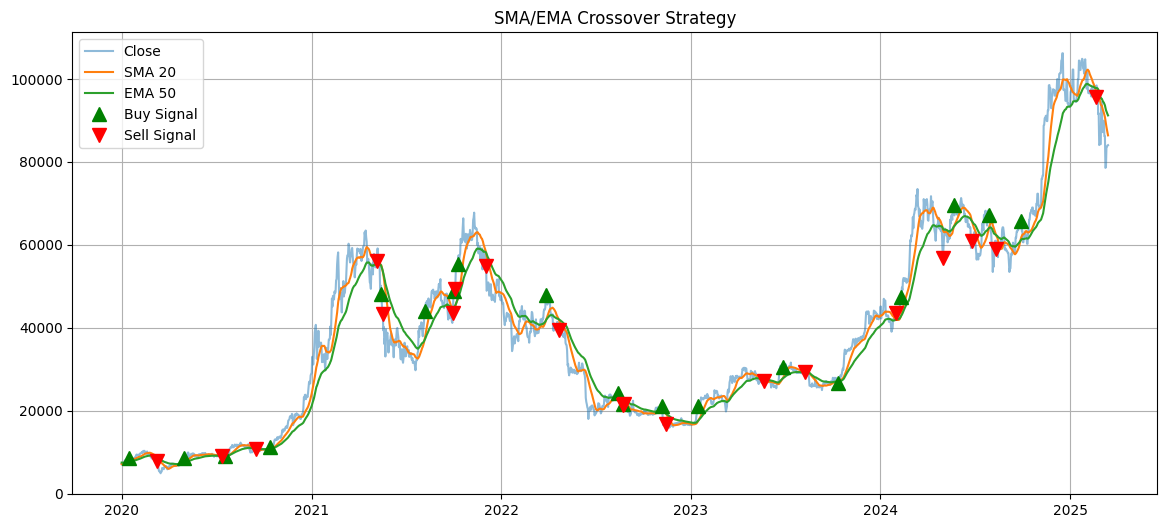

In [6]:
# Plotting SMA/EMA Crossover Strategy on daily timeframe
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_parquet('../data/btc_1d.parquet')
df = df[df.index >= '2020-01-01']

df['Signal'] = 0
df['Signal'] = np.where(df['SMA_20'] > df['EMA_50'], 1, 0)
df['Position'] = df['Signal'].diff()

plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close', alpha=0.5)
plt.plot(df['SMA_20'], label='SMA 20')
plt.plot(df['EMA_50'], label='EMA 50')

# Buy signal marker
plt.plot(df[df['Position'] == 1].index, df['Close'][df['Position'] == 1], '^', label='Buy Signal', color='green', markersize=10)

# Sell signal marker
plt.plot(df[df['Position'] == -1].index, df['Close'][df['Position'] == -1], 'v', label='Sell Signal', color='red', markersize=10)

plt.title('SMA/EMA Crossover Strategy')
plt.legend()
plt.grid(True)
plt.show()


<Axes: title={'center': 'Strategy vs Buy & Hold Performance'}, xlabel='datetime'>

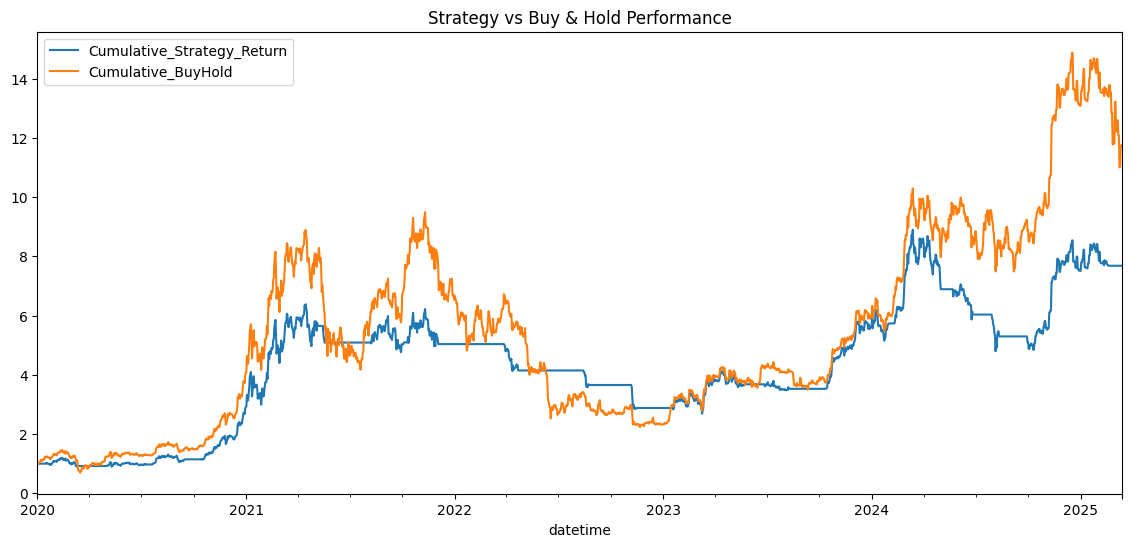

In [7]:
df['Strategy_Return'] = df['Daily_Return'] * df['Signal'].shift(1)
df['Cumulative_Strategy_Return'] = (1 + df['Strategy_Return']).cumprod()
df['Cumulative_BuyHold'] = (1 + df['Daily_Return']).cumprod()

df[['Cumulative_Strategy_Return', 'Cumulative_BuyHold']].plot(
    figsize=(14, 6), title='Strategy vs Buy & Hold Performance')


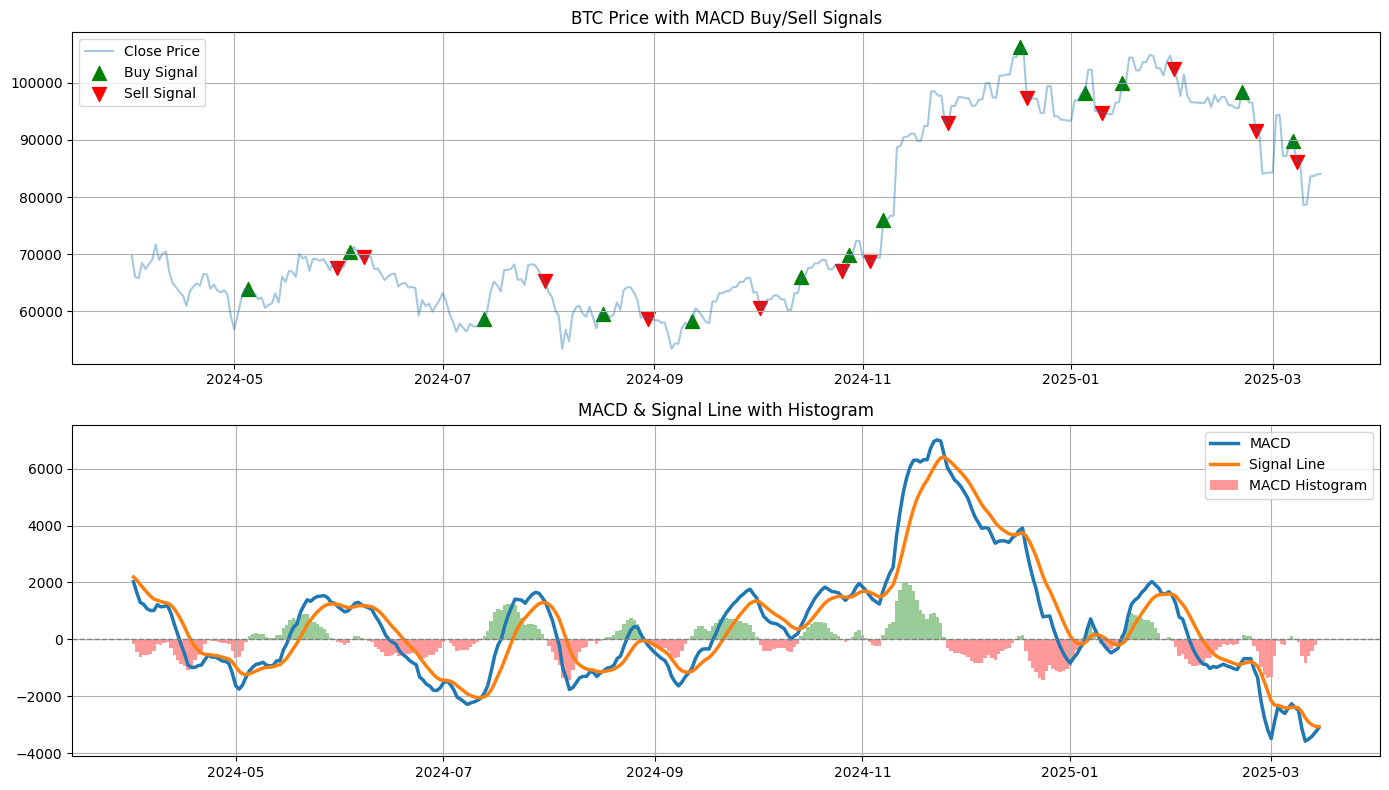

In [ ]:
# Plotting MACD buy/sell signals on BTC price
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_parquet('../data/btc_1d.parquet')
df = df[df.index >= '2024-04-01']

# MACD Crossover Conditions
df['MACD_Buy'] = (df['MACD'] > df['MACD_Signal']) & (df['MACD'].shift(1) <= df['MACD_Signal'].shift(1))
df['MACD_Sell'] = (df['MACD'] < df['MACD_Signal']) & (df['MACD'].shift(1) >= df['MACD_Signal'].shift(1))

# Plotting figure
plt.figure(figsize=(14,8))

# Plotting price
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', alpha=0.4)
plt.scatter(df[df['MACD_Buy']].index, df[df['MACD_Buy']]['Close'], label='Buy Signal', color='green', marker='^', s=100)
plt.scatter(df[df['MACD_Sell']].index, df[df['MACD_Sell']]['Close'], label='Sell Signal', color='red', marker='v', s=100)
plt.title("BTC Price with MACD Buy/Sell Signals")
plt.legend()
plt.grid(True)

# Plotting MACD, Signal, Histogram
plt.subplot(2, 1, 2)
plt.plot(df.index, df['MACD'], label='MACD', linewidth=2.5)
plt.plot(df.index, df['MACD_Signal'], label='Signal Line', linewidth=2.5)

# Plotting MACD Histogram shading
plt.bar(df.index, df['MACD_Histogram'], width=1.0,
        color=df['MACD_Histogram'].apply(lambda x: 'green' if x > 0 else 'red'),
        alpha=0.4, label='MACD Histogram')

plt.axhline(0, color='gray', linewidth=1, linestyle='--')
plt.title("MACD & Signal Line with Histogram")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



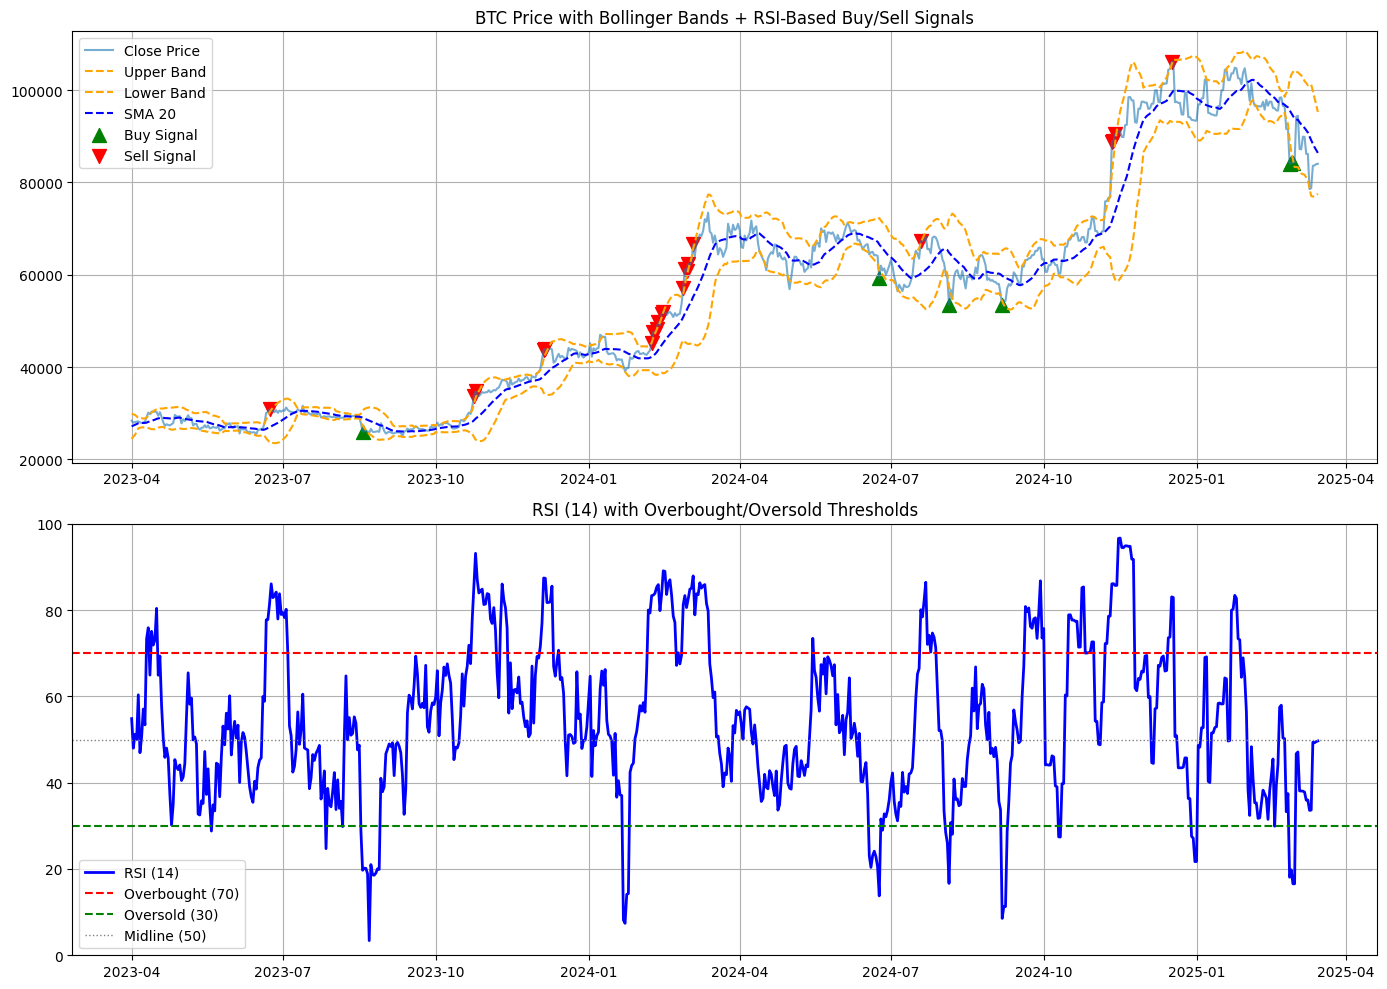

In [ ]:
# Plotting RSI + Bollinger Bands strategy
import matplotlib.pyplot as plt

df = pd.read_parquet('../data/btc_1d.parquet')
df = df[df.index >= '2023-04-01']

# Combined Signal Logic
df['Combo_Buy'] = (df['Close'] < df['Lower_Band_20']) & (df['RSI_14'] < 20)
df['Combo_Sell'] = (df['Close'] > df['Upper_Band_20']) & (df['RSI_14'] > 80)

# Plotting
plt.figure(figsize=(14, 10))

# Price with Bollinger Bands and Buy/Sell Points
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', alpha=0.6)
plt.plot(df.index, df['Upper_Band_20'], label='Upper Band', linestyle='--', color='orange')
plt.plot(df.index, df['Lower_Band_20'], label='Lower Band', linestyle='--', color='orange')
plt.plot(df.index, df['SMA_20'], label='SMA 20', linestyle='--', color='blue')

# Buy/Sell markers
plt.scatter(df[df['Combo_Buy']].index, df[df['Combo_Buy']]['Close'], label='Buy Signal', marker='^', color='green', s=100)
plt.scatter(df[df['Combo_Sell']].index, df[df['Combo_Sell']]['Close'], label='Sell Signal', marker='v', color='red', s=100)

plt.title("BTC Price with Bollinger Bands + RSI-Based Buy/Sell Signals")
plt.legend()
plt.grid(True)

# RSI Plot with Zones
plt.subplot(2, 1, 2)
plt.plot(df.index, df['RSI_14'], label='RSI (14)', color='blue', linewidth=2)
plt.axhline(70, color='red', linestyle='--', linewidth=1.5, label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', linewidth=1.5, label='Oversold (30)')
plt.axhline(50, color='gray', linestyle=':', linewidth=1, label='Midline (50)')

plt.ylim(0, 100)
plt.title("RSI (14) with Overbought/Oversold Thresholds")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



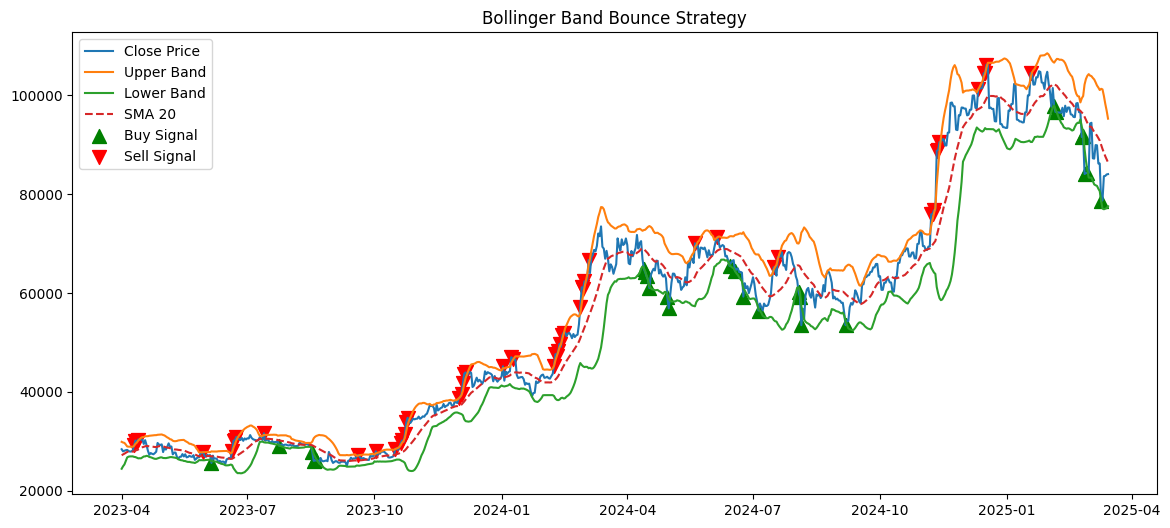

In [ ]:
# Plotting bollinger Bands
import matplotlib.pyplot as plt

df = pd.read_parquet('../data/btc_1d.parquet')
df = df[df.index >= '2023-04-01']

df['BB_Buy'] = df['Close'] < df['Lower_Band_20']
df['BB_Sell'] = df['Close'] > df['Upper_Band_20']

plt.figure(figsize=(14,6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['Upper_Band_20'], label='Upper Band')
plt.plot(df.index, df['Lower_Band_20'], label='Lower Band')
plt.plot(df.index, df['SMA_20'], label='SMA 20', linestyle='--')

plt.scatter(df[df['BB_Buy']].index, df[df['BB_Buy']]['Close'], label='Buy Signal', marker='^', color='green', s=100)
plt.scatter(df[df['BB_Sell']].index, df[df['BB_Sell']]['Close'], label='Sell Signal', marker='v', color='red', s=100)

plt.title("Bollinger Band Bounce Strategy")
plt.legend()
plt.show()


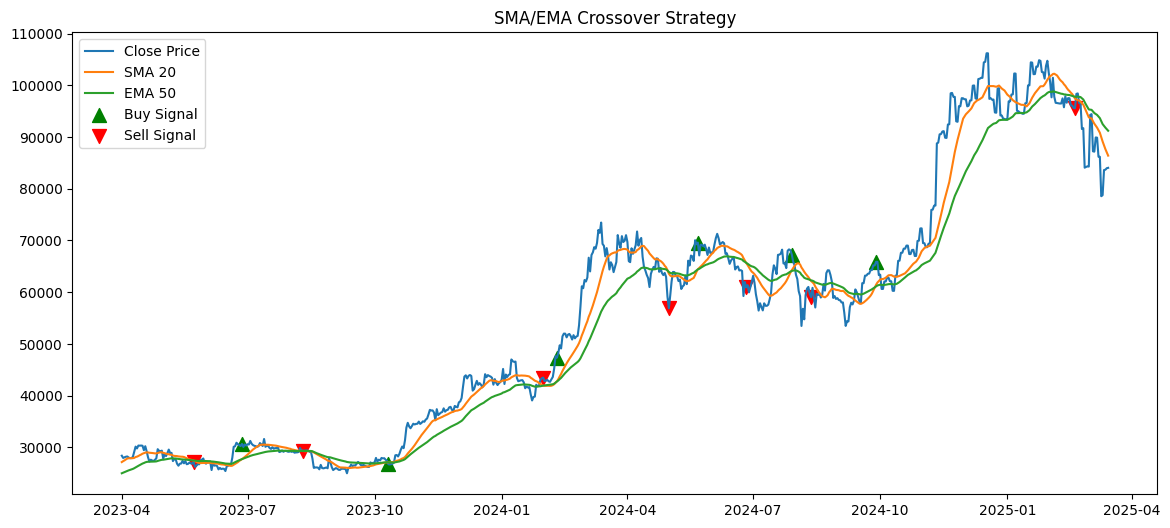

In [ ]:
# Plotting SMA/EMA crossovers (Golden cross and death cross)
import matplotlib.pyplot as plt

df = pd.read_parquet('../data/btc_1d.parquet')
df = df[df.index >= '2023-04-01']

df['SMA_EMA_Buy'] = (df['SMA_20'] > df['EMA_50']) & (df['SMA_20'].shift(1) <= df['EMA_50'].shift(1))
df['SMA_EMA_Sell'] = (df['SMA_20'] < df['EMA_50']) & (df['SMA_20'].shift(1) >= df['EMA_50'].shift(1))

plt.figure(figsize=(14,6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['SMA_20'], label='SMA 20')
plt.plot(df.index, df['EMA_50'], label='EMA 50')

plt.scatter(df[df['SMA_EMA_Buy']].index, df[df['SMA_EMA_Buy']]['Close'], label='Buy Signal', color='green', marker='^', s=100)
plt.scatter(df[df['SMA_EMA_Sell']].index, df[df['SMA_EMA_Sell']]['Close'], label='Sell Signal', color='red', marker='v', s=100)

plt.title("SMA/EMA Crossover Strategy")
plt.legend()
plt.show()


In [144]:
# Backtesting function

df = pd.read_parquet('../data/btc_1d.parquet')
df = df[df.index >= '2023-04-01'] 

def backtest_strategy(df, buy_signal, sell_signal, name):
    df = df.copy()
    position = 0
    entry_price = 0
    capital = 100000
    returns = []

    for i in range(1, len(df)):
        if buy_signal[i] and position == 0:
            position = 1
            entry_price = df['Close'].iloc[i]
        elif sell_signal[i] and position == 1:
            exit_price = df['Close'].iloc[i]
            profit_pct = (exit_price - entry_price) / entry_price
            returns.append(profit_pct)
            position = 0

    total_return = (1 + pd.Series(returns)).prod() - 1
    win_rate = pd.Series(returns)[pd.Series(returns) > 0].count() / len(returns) if returns else 0
    trades = len(returns)

    return {
        'Strategy': name,
        'Total Return (%)': round(total_return * 100, 2),
        'Win Rate (%)': round(win_rate * 100, 2),
        'Trades': trades
    }


In [ ]:
# Backtesting strategies using function above

results = []

# SMA/EMA
crossover_buy = (df['SMA_20'] > df['EMA_50']) & (df['SMA_20'].shift(1) <= df['EMA_50'].shift(1))
crossover_sell = (df['SMA_20'] < df['EMA_50']) & (df['SMA_20'].shift(1) >= df['EMA_50'].shift(1))
results.append(backtest_strategy(df, crossover_buy, crossover_sell, "SMA/EMA Crossover"))

# Bollinger Band
bb_buy = df['Close'] < df['Lower_Band_20']
bb_sell = df['Close'] > df['Upper_Band_20']
results.append(backtest_strategy(df, bb_buy, bb_sell, "Bollinger Band Bounce"))

# RSI and Bollinger Band
rsi_bollinger_buy= (df['Close'] < df['Lower_Band_20']) & (df['RSI_14'] < 30)
rsi_bollinger_sell = (df['Close'] > df['Upper_Band_20']) & (df['RSI_14'] > 70)
results.append(backtest_strategy(df, rsi_bollinger_buy, rsi_bollinger_sell, "RSI and Bollinger Band"))

# MACD
macd_buy = (df['MACD'] > df['MACD_Signal']) & (df['MACD'].shift(1) <= df['MACD_Signal'].shift(1))
macd_sell = (df['MACD'] < df['MACD_Signal']) & (df['MACD'].shift(1) >= df['MACD_Signal'].shift(1))
results.append(backtest_strategy(df, macd_buy, macd_sell, "MACD Crossover"))

C:\Users\Movahed\AppData\Local\Temp\ipykernel_10528\377543437.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if buy_signal[i] and position == 0:
C:\Users\Movahed\AppData\Local\Temp\ipykernel_10528\377543437.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif sell_signal[i] and position == 1:


                 Strategy  Total Return (%)  Win Rate (%)  Trades
0       SMA/EMA Crossover            108.76         50.00       6
1   Bollinger Band Bounce             38.43         60.00       5
2  RSI and Bollinger Band             42.63        100.00       3
3          MACD Crossover             80.66         42.31      26


C:\Users\Movahed\AppData\Local\Temp\ipykernel_10528\1625171422.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_results, x='Strategy', y='Total Return (%)', palette='viridis')


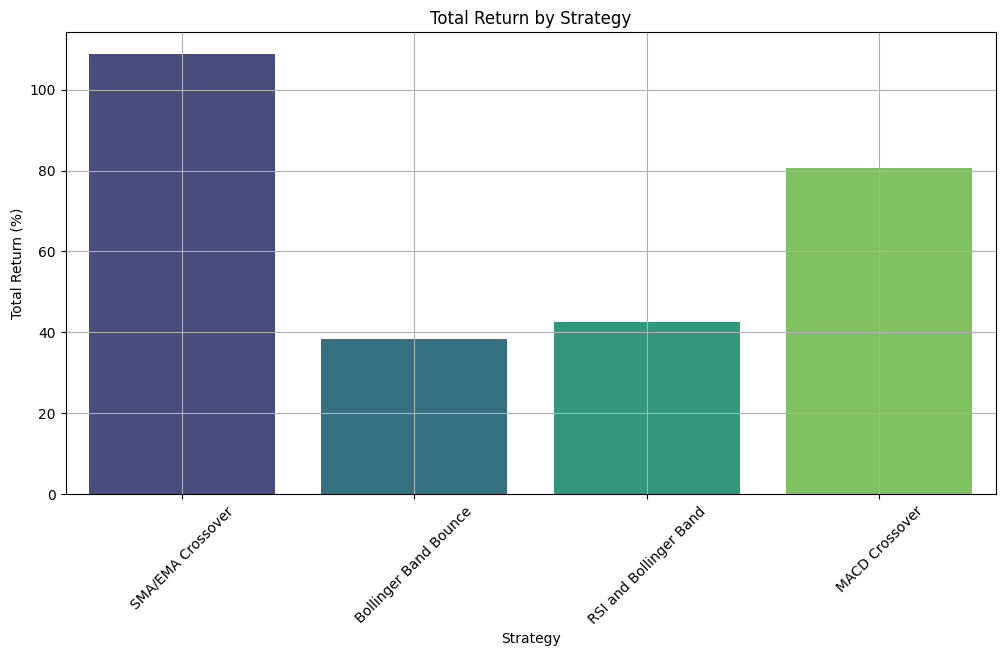

In [ ]:
# Displaying backtesting results

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_results = pd.DataFrame(results)


print(df_results)

# Plotting Bar Chart
plt.figure(figsize=(12,6))
sns.barplot(data=df_results, x='Strategy', y='Total Return (%)', palette='viridis')
plt.title("Total Return by Strategy")
plt.ylabel("Total Return (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
